In [1]:
from MomentumBT import MomentumBT as BT

In [2]:
tester = BT(symbol="EURUSD=X", start = "2018-01-01",end = "2019-12-31", window=3, leverage=7, quantile=0.9 )

[*********************100%%**********************]  1 of 1 completed


## Test methods and instantiation

In [3]:
tester.data.head()

,Price,returns,lev_returns,window
Date,,,,
2018-01-01,1.200495,NaN,NaN,NaN
2018-01-02,1.201158,0.000552,0.003860,NaN
2018-01-03,1.206345,0.004309,0.029783,1.202666
2018-01-04,1.201043,-0.004406,-0.031254,1.202849
2018-01-05,1.206884,0.004852,0.033479,1.204757


In [4]:
tester.backtest()

Strategy Net performance: 2.0067 || Strategy outperformance vs Buy and Hold: 1.0798


In [5]:
tester.result

,Price,returns,lev_returns,window,price_diff,mag_pricechange,positions,trades,creturns,clev_returns,strategy,strategy_net,cstrategy,cstrategy_net
Date,,,,,,,,,,,,,,
2018-01-04,1.201043,-0.004406,-0.031254,1.202849,0.000183,0.000152,-1.0,0.0,0.995604,0.969229,NaN,NaN,NaN,NaN
2018-01-05,1.206884,0.004852,0.033479,1.204757,0.001909,0.001587,-1.0,0.0,1.000446,1.002227,-0.033479,-0.033479,0.967075,0.967075
2018-01-08,1.203746,-0.002603,-0.018368,1.203891,-0.000866,0.000719,-1.0,0.0,0.997845,0.983986,0.018368,0.018368,0.985002,0.985002
2018-01-09,1.197046,-0.005582,-0.039743,1.202559,-0.001332,0.001107,-1.0,0.0,0.992291,0.945646,0.039743,0.039743,1.024938,1.024938
2018-01-10,1.192933,-0.003442,-0.024343,1.197908,-0.004650,0.003867,1.0,2.0,0.988882,0.922904,0.024343,0.020919,1.050195,1.046605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,1.109385,0.001264,0.008814,1.109988,-0.000736,0.000662,-1.0,0.0,0.919625,0.471123,-0.008814,-0.008814,2.730194,2.119139
2019-12-25,1.109016,-0.000333,-0.002331,1.108795,-0.001193,0.001075,-1.0,0.0,0.919319,0.470026,0.002331,0.002331,2.736567,2.124086
2019-12-26,1.109545,0.000477,0.003335,1.109316,0.000520,0.000469,-1.0,0.0,0.919758,0.471596,-0.003335,-0.003335,2.727457,2.117015


In [7]:
tester.result.mag_pricechange.max()

0.008629022742842718

In [9]:
tester.result.mag_pricechange.min()

7.498399250849275e-06

In [10]:
tester.result.mag_pricechange.mean() #on average the price is dropping

0.0017462371788853216

In [12]:
tester.result.mag_pricechange.abs().mean() #average magntude

0.0017462371788853216

In [13]:
tester.result.trades.value_counts()

trades
0.0    443
2.0     74
Name: count, dtype: int64

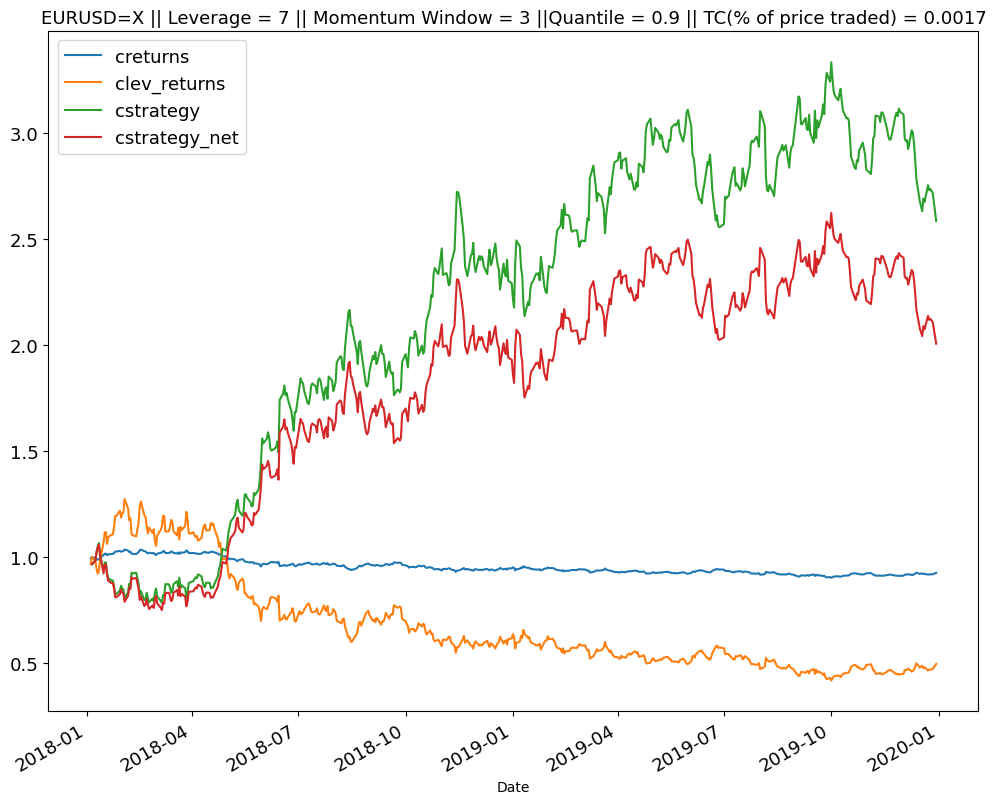

In [14]:
tester.plot_data()

## Test optimisation

In [28]:
tester.optimise_strategy(window_range=10,qrange = (0.2,1.0,10,False), leverage_range=(2,10))

Optimal Window : 1 ||Quantile : 0.92 || Leverage = 2 || Performance : 4.2926


In [29]:
tester.set_parameters(1,0.92,leverage=2)

In [30]:
print(tester)

MomentumBT: EURUSD=X, window = 1, quantile = 0.92, leverage = 2


In [31]:
tester.backtest()

Strategy Net performance: 4.2926 || Strategy outperformance vs Buy and Hold: 3.3611


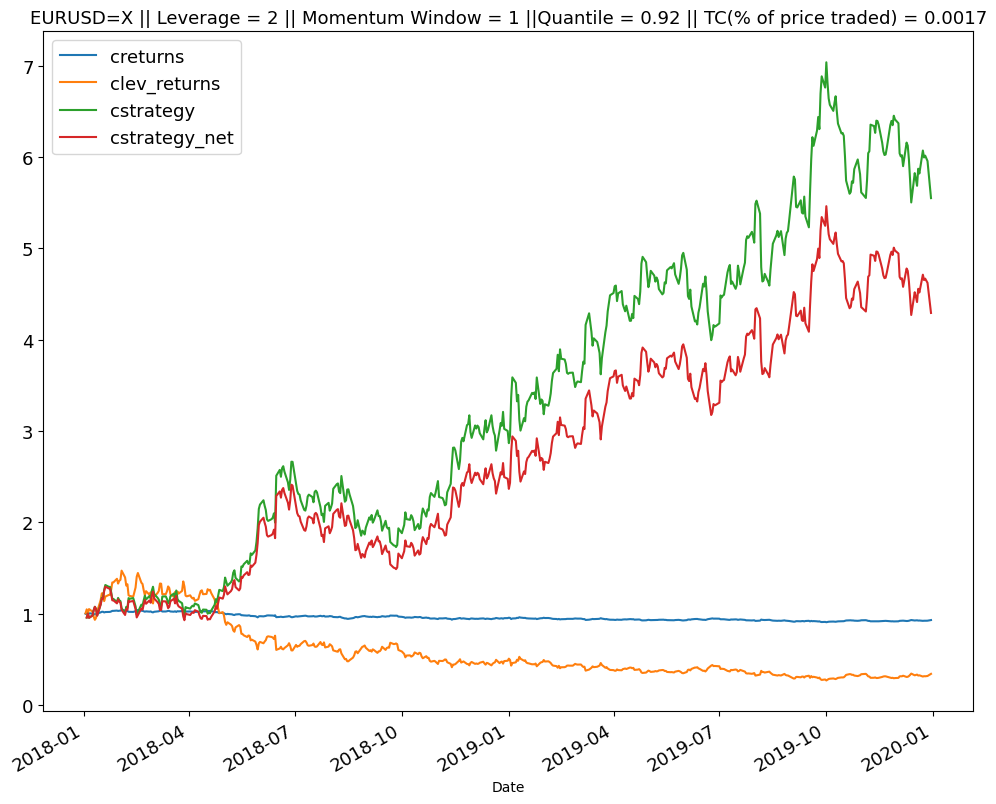

In [32]:
tester.plot_data()

In [33]:
tester.result.trades.value_counts()

trades
0.0    444
2.0     75
Name: count, dtype: int64

In [34]:
tester.optimisation_results

,Window,Quantile,Leverage,performance
0,1,0.20,2,0.4716
1,1,0.20,3,0.4716
2,1,0.20,4,0.4277
3,1,0.20,5,0.3860
4,1,0.20,6,0.3465
...,...,...,...,...
895,10,0.92,6,1.6848
896,10,0.92,7,1.9406
897,10,0.92,8,2.2493
898,10,0.92,9,2.6237


In [36]:
tester.optimisation_results.nlargest(10,columns="performance")

,Window,Quantile,Leverage,performance
81,1,0.92,2,4.2926
171,2,0.92,2,3.9240
891,10,0.92,2,3.6391
621,7,0.92,2,3.6060
89,1,0.92,10,3.5107
179,2,0.92,10,3.2444
441,5,0.92,2,3.2208
531,6,0.92,2,3.1641
261,3,0.92,2,3.1385
899,10,0.92,10,3.0801


## In & Outsample testing

In [48]:
train = BT("EURUSD=X", start="2017-01-01", end = "2019-12-31", window = 3)

[*********************100%%**********************]  1 of 1 completed


In [49]:
train

MomentumBT: EURUSD=X, window = 3, quantile = 0.5, leverage = 1

In [51]:
train.backtest()

Strategy Net performance: 0.3243 || Strategy outperformance vs Buy and Hold: -0.7488


In [52]:
train.optimise_strategy(window_range=10,qrange=(0.5,1.0,10,False), leverage_range=(1,10))

Optimal Window : 9 ||Quantile : 0.65 || Leverage = 1 || Performance : 2.7034


In [53]:
train.set_parameters(9,0.65,1)

In [54]:
train.backtest()

Strategy Net performance: 2.7034 || Strategy outperformance vs Buy and Hold: 1.6483


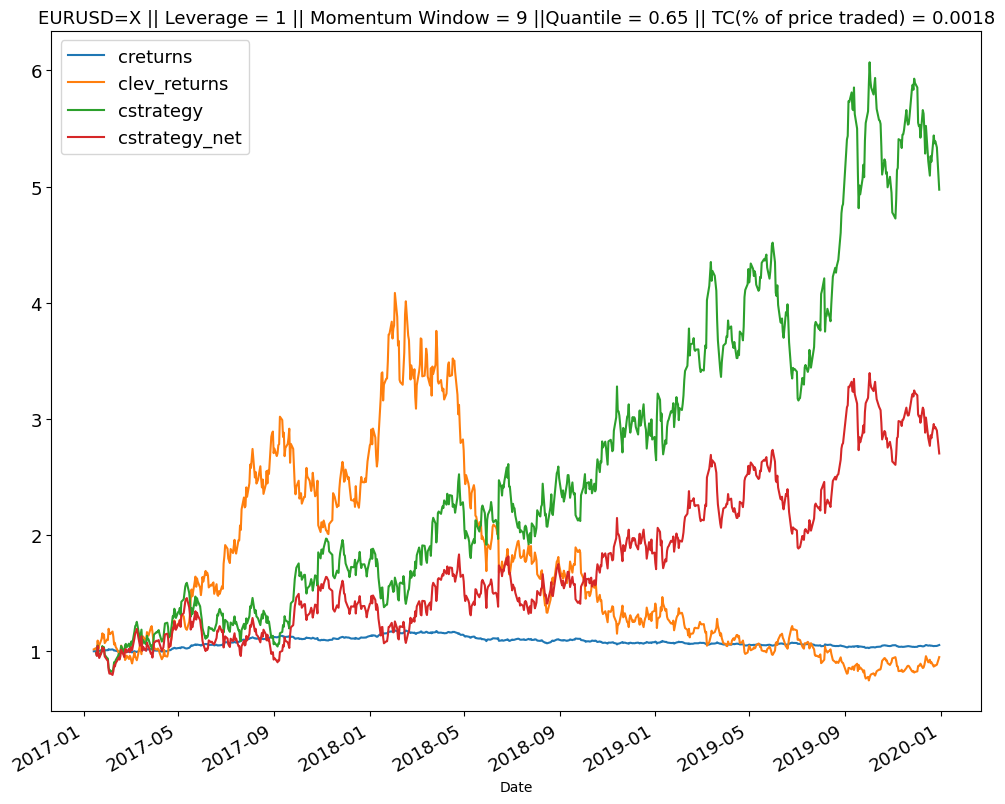

In [55]:
train.plot_data()

In [56]:
test = BT("EURUSD=X", start="2020-01-01", end = "2022-12-31", window = 9, quantile=0.65,leverage=1)

[*********************100%%**********************]  1 of 1 completed


In [57]:
print(test)

MomentumBT: EURUSD=X, window = 9, quantile = 0.65, leverage = 1


In [61]:
test.backtest()

Strategy Net performance: 0.5977 || Strategy outperformance vs Buy and Hold: -0.3613


c:\Users\eddri\anaconda3\envs\algotrade\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
c:\Users\eddri\anaconda3\envs\algotrade\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
c:\Users\eddri\anaconda3\envs\algotrade\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
c:\Users\eddri\anaconda3\envs\algotrade\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' ins

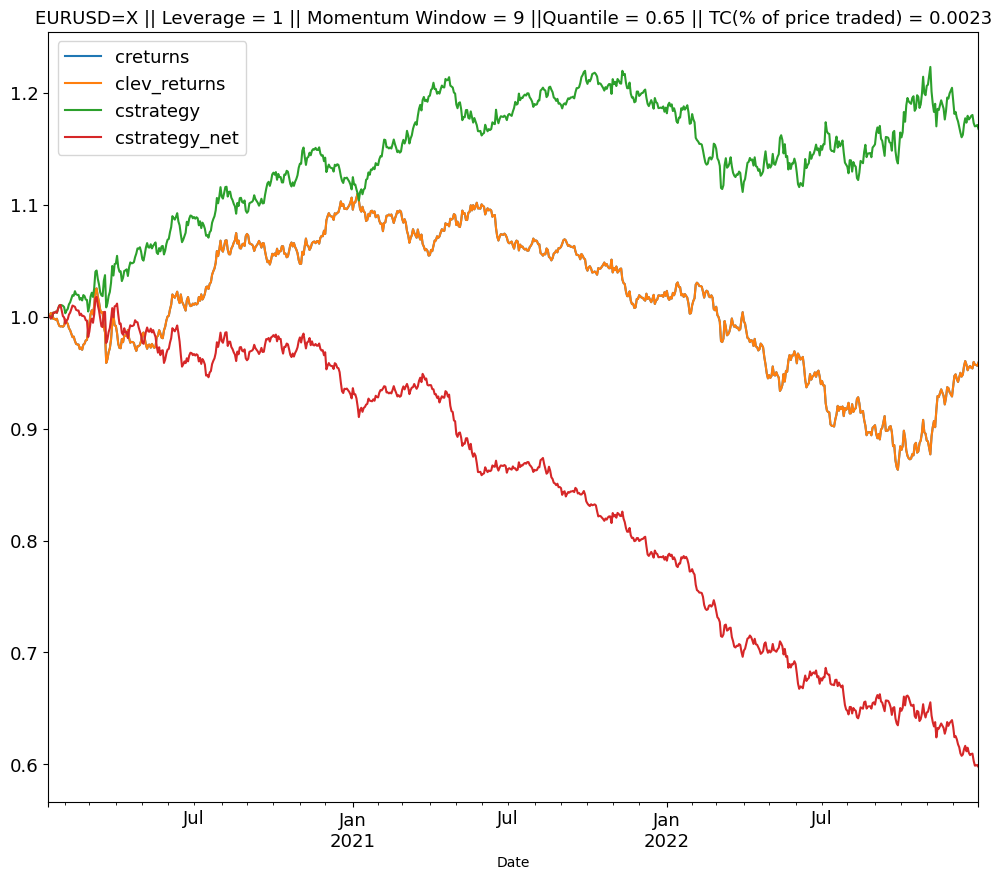

In [62]:
test.plot_data()